In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# keys = plt.rcParams.keys()
# print(keys)
# 'font.sans-serif': "Verdana",

custom_style = {
    'figure.figsize': (8, 6),
    'font.family':'sans-serif',
    'axes.facecolor': 'white',
    'figure.facecolor':'lightgray',
    'scatter.marker': 'o',
    'font.size': 9,
    'axes.grid': True
    }

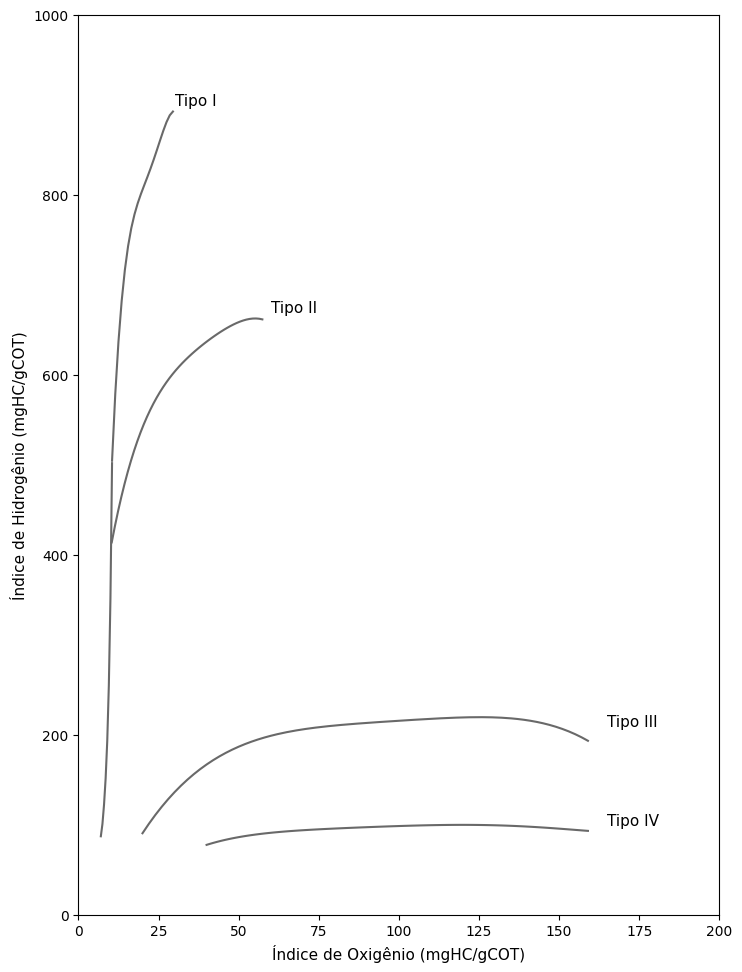

In [3]:



range1=np.arange(10.5,30)
range12=np.arange(7.0,11.0,0.5)
range2=np.arange(10.4,58)
range3=np.arange(20,160)
range4=np.arange(40,160)
IH1=[]
IH12=[]
IH2=[]
IH3=[]
IH4=[]
for x in range1:
    T1 =  (-0.01042*(x**4)) + (0.9557*(x**3)) - (32.58*(x**2)) + (499.2*x) - 2125
    IH1.append(T1)
IH1_df=pd.DataFrame(IH1)
for x in range12:
    T12 = (3.107862854*(x**4)) - (96.793044354*(x**3)) + (1144.1301092*(x**2)) - (6036.4831648*x) + 12018.171211
    IH12.append(T12)
IH12_df=pd.DataFrame(IH12)
for x in range2:
    T2 = ((-0.00011683)*(x**4)) + (0.01916740603*(x**3)) - (1.2250636761*(x**2)) + (38.6173184469*x) + 124.366169274
    IH2.append(T2)
IH2_df=pd.DataFrame(IH2)
for x in range3:
    T3 = ((-2.543*(10**-6)*(x**4))) + (0.00101*(x**3)) - (0.1514*(x**2)) + (10.38*x) - 64.21
    IH3.append(T3)
IH3_df=pd.DataFrame(IH3)
for x in range4:
    T4 = ((1.047*(10**-8))*(x**5))-((5.815*(10**-6))*(x**4)) + (0.001245*(x**3)) - (0.1309*(x**2)) + (6.969*x) - 57.58
    IH4.append(T4)
IH4_df=pd.DataFrame(IH4)

# Figura com tamanho A4

a4_width = 8.27  # inches
a4_height = 11.69  # inches

fig,ax = plt.subplots(figsize=(a4_width, a4_height))

ax1=ax.plot(range1,IH1_df, c="dimgray")
ax12=ax.plot(range12,IH12_df, c="dimgray")
ax2=ax.plot(range2,IH2_df, c="dimgray")
ax3=ax.plot(range3,IH3_df, c="dimgray")
ax4=ax.plot(range4,IH4_df, c="dimgray")
ax.set_xlim(0,200)
ax.set_ylim(0,1000)
ax.set_ylabel("Índice de Hidrogênio (mgHC/gCOT)", fontsize=11)
ax.set_xlabel("Índice de Oxigênio (mgHC/gCOT)", fontsize=11)
ax.text(30,900, "Tipo I", fontsize=11)
ax.text(60,670, "Tipo II", fontsize=11)
ax.text(165,210, "Tipo III", fontsize=11)
ax.text(165,100, "Tipo IV", fontsize=11)
plt.style.use(custom_style)


### Distância Euclidiana em 2D

#### Faixas de Valores:

* Tipo I: {IH > 600} ___ {S1/S3 > 15}
* Tipo II: {IH > 300 and IH <= 600} ___ {S1/S3 > 10 and S1/S3 <15}
* Tipo II/III: {IH > 200 and IH <=300} ___ {S1/S3 > 5 and S1/S3 < 10]
* Tipo III: {IH > 50 and IH <= 200} ___ {S1/S3 > 1 and S1/S3 < 5}
* Tipo IV: {IH <= 50} ___ {S1/S3 < 1}

#### Definição de centróides

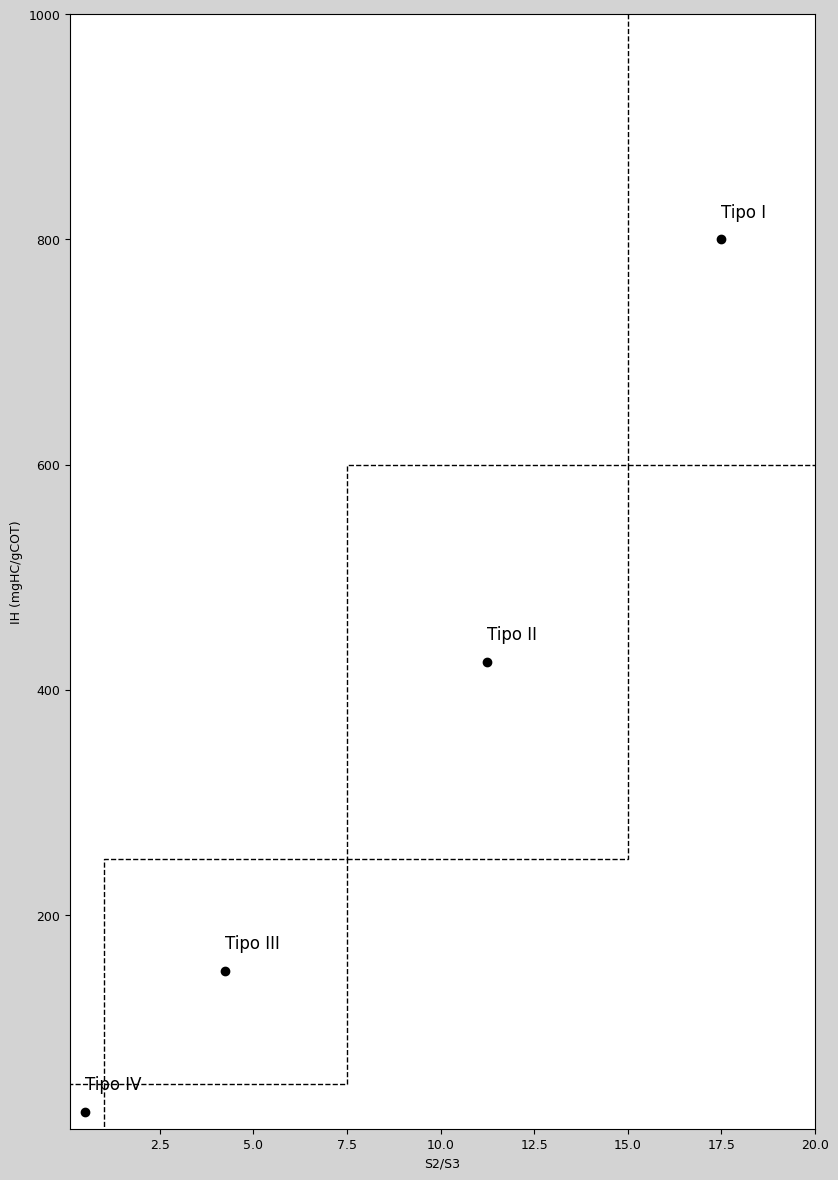

In [8]:
# Figura com tamanho A4

a4_width = 8.27  # inches
a4_height = 11.69  # inches

fig= plt.figure(figsize=(a4_width, a4_height), layout='constrained')
ax=fig.add_subplot()

aIH=(800,425,150,25)
S=(17.5,11.25,4.25,0.5)
ax.scatter(S,aIH, c="black")
ax.add_patch(patches.Rectangle((15,600),400,500, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo 1
ax.add_patch(patches.Rectangle((7.5,250),7.5,350, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo II
ax.add_patch(patches.Rectangle((1,50),6.5,200, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo III
ax.add_patch(patches.Rectangle((0,0),1,50, linewidth=1, edgecolor='black', facecolor='none', linestyle="--"))  # Tipo IV
ax.text(17.5,820, "Tipo I", fontsize=12)
ax.text(11.25,445, "Tipo II", fontsize=12)
ax.text(4.25,170, "Tipo III", fontsize=12)
ax.text(0.5,45, "Tipo IV", fontsize=12)
ax.set_xlim(0.1,20)
ax.set_ylim(10,1000)
ax.set_xlabel("S2/S3")
ax.set_ylabel("IH (mgHC/gCOT)")
ax.grid(False)
plt.style.use(custom_style)
plt.savefig("VanKerv_IH_S.pdf")




#### Condicionantes sobre equação a ser utilizada e cálculo de percentual

In [5]:
df = pd.read_csv("Poços_Marinho/1-ALS-11-AL.csv")
df["S2/S3"]=(df["S2"]/df["S3"]).round(2)


T1 = []
T2 = []
T3 = []
T4 = []
for index, row in df.iterrows():
    i = row['IH']
    j = row['S2/S3']
    dist12=np.sqrt(((17.5-11.25)**2+((800-425)**2)))
    dist23=np.sqrt(((11.25-3.25)**2+((425-150)**2)))
    dist34=np.sqrt(((4.25-0.5)**2+((150-25)**2)))
    dista1=np.sqrt(((j-17.5)**2+((i-800)**2)))
    dista2=np.sqrt(((j-11.25)**2+((i-425)**2)))
    dista3=np.sqrt(((j-4.25)**2+((i-150)**2)))
    dista4=np.sqrt(((j-0.5)**2+((i-25)**2))) 
    bd1=(((dist12)**2)-((dista2)**2)+((dista1)**2))/(2*dist12)
    bd2=(((dist23)**2)-((dista3)**2)+((dista2)**2))/(2*dist23)
    bd3=(((dist34)**2)-((dista4)**2)+((dista3)**2))/(2*dist34)
    pct1=((bd1/dist12)*100).round(2)
    pct2=((bd2/dist23)*100).round(2)
    pct3=((bd3/dist34)*100).round(2)
    if i >= 800:
        T1.append(100) 
        T2.append(0)
        T3.append(0)
        T4.append(0) 
    elif i >= 425 and i <=800:
        T1.append(100-pct1) 
        T2.append(pct1)
        T3.append(0)
        T4.append(0) 
    elif i >= 150 and i < 425:
        T1.append(0) 
        T2.append(100-pct2)
        T3.append(pct2)
        T4.append(0) 
    elif i>=25 and i<150:
        T1.append(0) 
        T2.append(0)
        T3.append(100-pct3)
        T4.append(pct3)
    elif i>=0 and i<25:
        T1.append(0) 
        T2.append(0)
        T3.append(0)
        T4.append(100)
    else:
        T1.append("") 
        T2.append("")
        T3.append("")
        T4.append("")

df["% Tipo I"]=T1
df["% Tipo II"]=T2
df["% Tipo III"]=T3
df["% Tipo IV"]=T4
df

,Profundidade,COT,S1,S2,S3,Tmax,Ro,IH,IO,S2/S3,% Tipo I,% Tipo II,% Tipo III,% Tipo IV
0,1179.5,1.15,0.08,2.58,0.99,433.0,NaN,224.35,86.09,2.61,0,27.01,72.99,0
1,1197.5,1.08,0.06,2.13,1.37,435.0,NaN,197.22,126.85,1.55,0,17.14,82.86,0
2,1215.5,1.02,0.03,1.94,1.26,438.0,NaN,190.20,123.53,1.54,0,14.59,85.41,0
3,1233.5,1.48,0.30,5.12,1.26,434.0,NaN,345.95,85.14,4.06,0,71.2,28.8,0
4,1251.5,1.36,0.03,2.67,1.23,432.0,NaN,196.32,90.44,2.17,0,16.82,83.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1666.1,1.00,0.15,2.83,0.82,443.0,NaN,283.00,82.00,3.45,0,48.33,51.67,0
66,1800.5,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,
67,1806.5,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,
68,1890.0,2.16,0.23,10.42,0.72,441.0,NaN,482.41,33.33,14.47,15.32,84.68,0,0
